In [32]:
import georinex as gr
import time
import pickle
import numpy as np
from gnsstimetrans import utctoweekseconds
from gpspos import gpspos_ecef, correctPosition


def SellectSystem(all_sat, system):
    system_letter = {
        'GPS': "G",
        'GLONASS': "R",
        'Beidou': "C",
        'Galileo': "E",
    }
    letter = system_letter.get(system, None)

    all_sat = np.array(all_sat)
    want_sat = []
    for i in range(len(all_sat)):
        if all_sat[i][0] == letter:
            want_sat = np.append(want_sat, all_sat[i])
    return want_sat


if __name__ == '__main__':
    # load observation
    obs = gr.load('data/20200384.21o')
    # pickle.dump(obs, open('data/INSA002mA_21o_temp.txt', 'wb'))
    # obs = pickle.load(open('data/INSA003mA_21o_temp.txt', 'rb'))
    # print('finished')
    # end = time.clock()
    # print(end - start)

    # load correspond ephemeris
    epoch_first = str(np.array(obs.time[0]))[0:19]
    print(epoch_first)
    epoch_last = str(np.array(obs.time[-1]))[0:19]
    print(epoch_last)
    eph = gr.load('data/20200384.21n', tlim=[epoch_first, epoch_last])
    print("init obs eph")
    # list all available satellites
    GPS = SellectSystem(eph.sv, 'GPS')
    print('\nAvailable satellite:\n', GPS)
    P_obs = np.zeros([len(GPS), 1])
    P_computed = np.zeros([len(GPS), 1])
    A = np.zeros([len(GPS), 4])
    delta_P = np.zeros([len(GPS), 1])
    A[:, 3] = 299792458
    sat_pos = np.zeros([len(GPS), 3])
    tList = []
    
    for minute in range(0,60,2):
        second = 0
        tList.append(f"2021-01-02T12:{minute}:{second}")
        
    (x0,y0,z0) = llh2ecef([30.549,32.229,6378137])

    GPS_row = []
    for n in range(len(GPS)):
        GPS_row_singleSat = {"sv":GPS[n],"dataByTime":[]}
        for t in tList:
            # print('Use satellite:', GPS[n])
            ## calculate the position of satellite GPS_n
            GPS_n = eph.sel(sv=GPS[n]).dropna(dim='time', how='all')
            soW = utctoweekseconds(t, 0)[1]
            # print('Time of the week:', soW)
            GPS_n_pos_raw = gpspos_ecef(GPS_n, soW)
            [x,y,z] = GPS_n_pos_raw.tolist()
            (E,A) = ENU2EA(ECEF2ENU(x, y, z, x0, y0, z0))
#             print(E,A)
            GPS_row_singleSat['dataByTime'].append({"time":t,"data":GPS_n_pos_raw,"EA":[E,A]})
            # print('\nPosition of satellite', GPS[n], ':\n', GPS_n_pos)
            print(GPS_n_pos_raw,E,A)
        GPS_row.append(GPS_row_singleSat)

2021-01-02T12:00:00
2021-01-02T12:59:59
init obs eph

Available satellite:
 ['G05' 'G06' 'G07' 'G08' 'G09' 'G13' 'G14' 'G15' 'G16' 'G18' 'G23' 'G24'
 'G28' 'G30']
[25155483.14402398 -3547670.35627412  7917488.68523686] 27.53381727621116 -17.440907028588143
[25272521.20855472 -3506221.84641824  7564307.90178104] 27.8564347455265 -19.131800426579066
[25384512.17122    -3465978.07558076  7208822.87523214] 28.13899304552846 -20.833253348594496
[25491412.3886455  -3426859.81647775  6851142.53907143] 28.38057512665216 -22.543213388066807
[25593180.77834232 -3388786.83487787  6491376.42737931] 28.58039023965363 -24.259513636419175
[25689778.84293177 -3351677.9531861   6129634.64135124] 28.737778982254333 -25.979890395444574
[25781170.69266123 -3315451.11462347  5766027.81572533] 28.85221712508485 -27.70200301108354
[25867323.06619897 -3280023.44795878  5400667.08513134] 28.923318107670887 -29.423455433735644
[25948205.34969699 -3245311.33274473  5033664.05037133] 28.950834126077705 -31.141819

[-9645380.95981385 13280927.94888562 20830396.88129529] 39.60285706652069 -41.41527549896758
[-9789945.40921414 12996925.84816084 20945213.31619971] 39.2392627089076 -41.887937837938196
[-9937222.76702327 12712475.20439389 21053586.4844396 ] 38.86625196124874 -42.35884258896032
[-10087186.81053254  12427690.18747101  21155485.05336118] 38.483584096470445 -42.82792387937948
[-10239808.73366957  12142684.5123418   21250879.70751685] 38.09101348889108 -43.29509260586896
[-10395057.16282378  11857571.36700006  21339743.15526204] 37.6882910052336 -43.76023349723796
[-10552898.17449439  11572463.34095759  21422050.13469743] 37.27516564374555 -44.22320234298868
[-10713295.31474668  11287472.35425855  21497777.41895802] 36.85138642013161 -44.683823452024285
[-10876209.62046019  11002709.58708255  21566903.82085038] 36.41670449305303 -45.14188740734764
[-11041599.64235108  10718285.40998363  21629410.19683994] 35.970875515346826 -45.59714918206589
[-11209421.46974955  10434309.31481256  2168527

[16881975.21292016 13439038.82220788 15483190.26003559] 54.56005978628382 -11.242956051647782
[16642845.99857843 13429317.02406898 15748067.81824237] 55.63941033838791 -10.097541349194916
[16399731.69629536 13420728.87826237 16008119.45975987] 56.72604860196326 -8.933363638414264
[16152708.60970742 13413345.40979164 16263265.46388188] 57.818700598019014 -7.74706061732724
[15901855.17088788 13407236.01313926 16513427.61268907] 58.916063485414874 -6.534754917289907
[15647251.89331254 13402468.39946082 16758529.2150536 ] 60.01679974814843 -5.291973246454693
[15388981.32343218 13399108.54500233 16998495.13017473] 61.11952940829381 -4.013549986497285
[15127127.99088665 13397220.64077443 17233251.79063847] 62.22281987074412 -2.69351199548769
[14861778.35739294 13396867.04351997 17462727.22499398] 63.32517290307807 -1.3249407244629738
[14593020.76434254 13398108.22800895 17686851.07984014] 64.42500812042398 0.10019296539142568
[14320945.37914355 13401002.74069375 17905554.6414153 ] 65.5206421

[  1108845.98467407 -21136803.66465967  16006094.49876487] 31.992646819503335 76.68644969587598
[  1263443.89116879 -21324453.39499832  15743013.80411951] 33.30962394384619 76.57184890453053
[  1414485.87264626 -21509860.70332145  15475096.83592755] 34.637368600435046 76.475721985543
[  1561977.25044003 -21692920.36529069  15202425.69387498] 35.97526890586598 76.39870983316735
[  1705925.99695808 -21873527.81505826  14925083.94930562] 37.32272411735082 76.3415422477219
[  1846342.72196188 -22051579.21600871  14643156.61959348] 38.67914351189118 76.30505090760725
[  1983240.6569995  -22226971.53107966  14356730.14205219] 40.0439450704322 76.29018436617505
[  2116635.6380055  -22399602.59261229  14065892.34738935] 41.41655394133894 76.29802549734684
[  2246546.08607568 -22569371.17168324  13770732.43271436] 42.79640064937176 76.32981191188873
[  2372992.98643554 -22736177.0468691   13471340.93410739] 44.1829190061514 76.38695999033628
[  2495999.8656127  -22899921.0723958   13167809.6987

[17086812.72885999 12952440.07552331 16123229.50910495] 53.39204333330029 -8.294623519978497
[16850522.4148117  12945388.3369787  16386907.46702053] 54.4525568752546 -7.174920427244262
[16610405.13826584 12939651.44311925 16645717.01269952] 55.51887754875983 -6.04046268993903
[16366541.25297046 12935299.88216835 16899585.05218619] 56.5898481335028 -4.888340788215256
[16119012.99516817 12932402.37225479 17148440.02323735] 57.66429280043106 -3.715235118168561
[15867904.43294318 12931025.81404737 17392211.90987726] 58.74101208048118 -2.5173578010300024
[15613301.4145633  12931235.24473385 17630832.25648673] 59.81877637854967 -1.2903842043813583
[15355291.51585352 12933093.79336452 17864234.18143021] 60.89631778727621 -0.02937225751417497
[15093963.98663544 12936662.63758302 18092352.39022535] 61.97231989453082 1.2713326786404677
[14829409.69626907 12942000.96176451 18315123.18825851] 63.04540520168993 2.618209967310426
[14561721.07833249 12949165.91658081 18532484.49305082] 64.11411967352

In [30]:

[x,y,z] = GPS_n_pos_raw.tolist()
[x,y,z]

[25155483.14402398, -3547670.356274117, 7917488.685236863]

In [5]:
GPS_row

[{'sv': 'G05',
  'dataByTime': [{'time': '2021-01-02T12:0:0',
    'data': array([25155483.14402398, -3547670.35627412,  7917488.68523686])},
   {'time': '2021-01-02T12:2:0',
    'data': array([25272521.20855472, -3506221.84641824,  7564307.90178104])},
   {'time': '2021-01-02T12:4:0',
    'data': array([25384512.17122   , -3465978.07558076,  7208822.87523214])},
   {'time': '2021-01-02T12:6:0',
    'data': array([25491412.3886455 , -3426859.81647775,  6851142.53907143])},
   {'time': '2021-01-02T12:8:0',
    'data': array([25593180.77834232, -3388786.83487787,  6491376.42737931])},
   {'time': '2021-01-02T12:10:0',
    'data': array([25689778.84293177, -3351677.9531861 ,  6129634.64135124])},
   {'time': '2021-01-02T12:12:0',
    'data': array([25781170.69266123, -3315451.11462347,  5766027.81572533])},
   {'time': '2021-01-02T12:14:0',
    'data': array([25867323.06619897, -3280023.44795878,  5400667.08513134])},
   {'time': '2021-01-02T12:16:0',
    'data': array([25948205.34969699, 

In [19]:
from math import sqrt
def dop(XYZ_satGroup, XYZ_obs):

    x,  y,  z  = XYZ_obs[0], XYZ_obs[1], XYZ_obs[2]

    # measurement residual equations
    vector_list = []
    for sat in XYZ_satGroup:
        xsat, ysat, zsat = sat[0], sat[1], sat[2]
        R = sqrt(pow(xsat-x,2) + pow(ysat-y,2) + pow(zsat-z,2))
        i = -((xsat-x)/R)
        j = -((ysat-y)/R)
        k = -((zsat-z)/R)
        l = 1

        vector = [i,j,k,l]
        vector_list.append(vector)

    A = np.array(vector_list)

    # AT = transpose of A
    AT = A.transpose()

    # AT*A (AT is 4x4 matrix, A is 4x4 matrix, result is 4x4)
    ATA = [[0,0,0,0],
           [0,0,0,0],
           [0,0,0,0],
           [0,0,0,0]]

    # iterate through rows of AT
    for i in range(len(AT)):
       # iterate through columns of A
       for j in range(len(A[0])):
           # iterate through rows of A
           for k in range(len(A)):
               ATA[i][j] += AT[i][k] * A[k][j]

    # Q = (AT * A)^-1
    Q = np.linalg.inv(ATA)

    PDOP = sqrt(Q[0][0] + Q[1][1] + Q[2][2])
    TDOP = sqrt(Q[3][3])
    GDOP = sqrt(pow(PDOP,2) + pow(TDOP,2))
    HDOP = sqrt(Q[0][0] + Q[1][1])
    VDOP = sqrt(Q[2][2])

    return GDOP, PDOP, TDOP, HDOP, VDOP

In [37]:

from geodesy import llh2ecef,ENU2EA,ECEF2ENU
XYZ_obs = list(llh2ecef([30.549,32.229,6378137]))

GDOPList = []
for t in tList:
#     print(t)
    satGroup = []
    for sv in GPS_row:
        for item in sv['dataByTime']:
            if item['time'] == t:
                if item['EA'][1]>15:
                    satGroup.append(item['data'])
    GDOP = dop(satGroup, XYZ_obs)[0]
    GDOPList.append(GDOP)


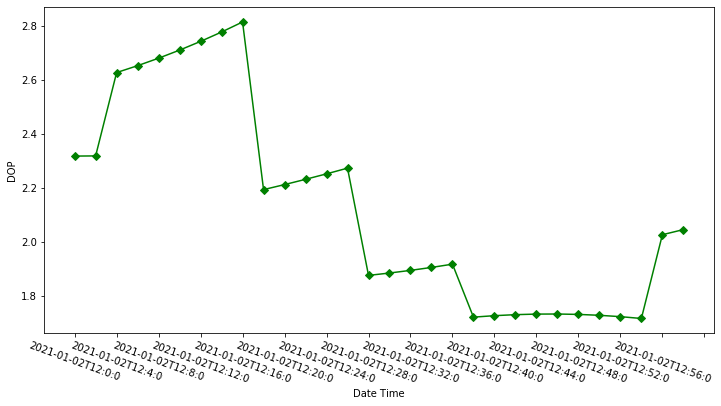

In [59]:
import matplotlib.pyplot as plt
#准备绘制数据
x = ["Mon", "Tues", "Wed", "Thur", "Fri","Sat","Sun"]
y = [20, 40, 35, 55, 42, 80, 50]


tick_spacing = 2
#通过修改tick_spacing的值可以修改x轴的密度
#1的时候1到16，5的时候只显示几个
fig, ax = plt.subplots(1,1,figsize=(12,6))
# plt.figure(figsize=(6,8))
ax.plot(tList, GDOPList, "g", marker='D', markersize=5, label="周活")
ax.set_xlabel("Date Time")
ax.set_ylabel("DOP")
plt.xticks(rotation=-20)   # 设置横坐标显示的角度，角度是逆时针，自己看
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.show()

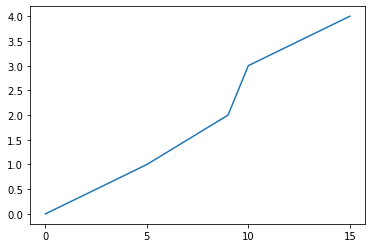

In [44]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

x = [0,5,9,10,15]
y = [0,1,2,3,4]

tick_spacing = 1
tick_spacing = 5
#通过修改tick_spacing的值可以修改x轴的密度
#1的时候1到16，5的时候只显示几个
fig, ax = plt.subplots(1,1)
ax.plot(x,y)
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.show()


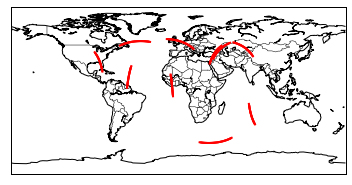

In [34]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt 
from geodesy import ecef2llh
map = Basemap() 
map.drawmapboundary() 
map.drawcoastlines() 
map.drawcountries() 

GPS_n_pos_raw_part = GPS_row[:]

for n in range(len(GPS)):
    lastPos = (0,0,0)
    GPS_sv = GPS_n_pos_raw_part[n]
    for item in GPS_sv:
        Pos = tuple(item)
        if lastPos[0]>0:
            start_lat,start_lon,_ = ecef2llh(lastPos)
            end_lat,end_lon,_ = ecef2llh(Pos)
            map.drawgreatcircle(start_lon, start_lat, end_lon, end_lat, linewidth=2,color = "red")
        lastPos = Pos

plt.show() 

In [19]:
from geodesy import ecef2llh

In [36]:
import sys
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from PyQt5.QtWidgets import QApplication, QWidget, QVBoxLayout
# from matplotlib.backends.backend_qtagg import FigureCanvas, NavigationToolbar2QT as NavigationToolbar
import matplotlib.pyplot as plt

from matplotlib.backends.qt_compat import QtCore, QtWidgets
if QtCore.qVersion() >= "5.":
    from matplotlib.backends.backend_qt5agg import (
        FigureCanvas, NavigationToolbar2QT as NavigationToolbar)
else:
    from matplotlib.backends.backend_qt4agg import (
        FigureCanvas, NavigationToolbar2QT as NavigationToolbar)

plotfig


SystemExit: 0

c:\users\lixin\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3449: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


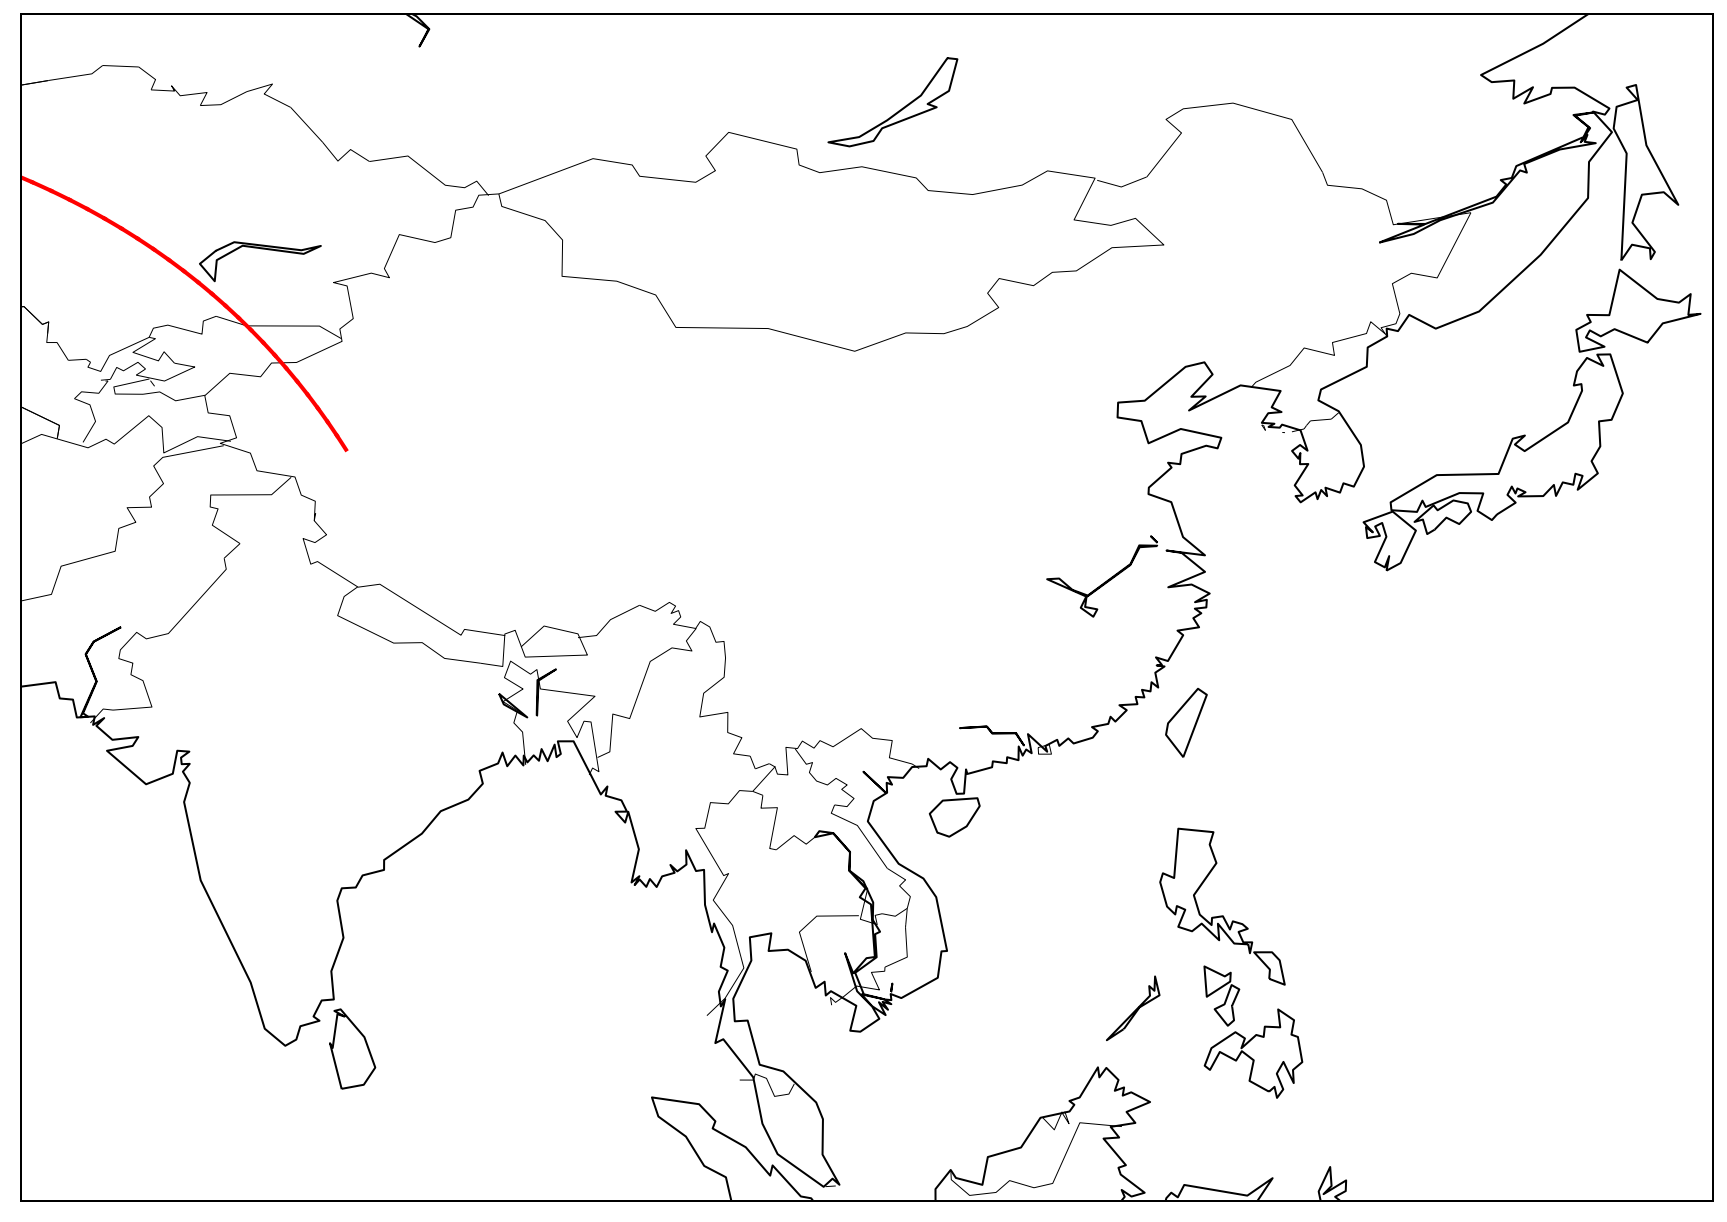

In [37]:

from matplotlib.figure import Figure

class MainWin(QWidget):
    def __init__(self):
        super().__init__()
        self.setWindowTitle("matplotlib embeded in Python Qt with figure toolbar")
        self.initUI()
        self.plotfig()
        
    def initUI(self): 
        self.fig = plt.figure()                                                   #创建figure对象
        self.canvas=FigureCanvas(self.fig)                              #创建figure画布
        self.figtoolbar=NavigationToolbar(self.canvas, self)     #创建figure工具栏
       
        vlayout=QVBoxLayout()
        vlayout.addWidget(self.canvas)                                 #画布添加到窗口布局中
        vlayout.addWidget(self.figtoolbar)                             #工具栏添加到窗口布局中
        self.setLayout(vlayout)
        
    def plotfig(self):                                                            #绘制matplot图形
        print("plotfig")
#         ax = self.fig.subplots()
        map = Basemap() 
        map.drawmapboundary() 
        map.drawcoastlines() 
        map.drawcountries() 

        GPS_n_pos_raw_part = GPS_row[:]

        for n in range(len(GPS)):
            lastPos = (0,0,0)
            GPS_sv = GPS_n_pos_raw_part[n]
            for item in GPS_sv:
                Pos = tuple(item)
                if lastPos[0]>0:
                    start_lat,start_lon,_ = ecef2llh(lastPos)
                    end_lat,end_lon,_ = ecef2llh(Pos)
                    map.drawgreatcircle(start_lon, start_lat, end_lon, end_lat, linewidth=2,color = "red")
                lastPos = Pos

#         plt.show() 
#         print(self.fig)
#         ax = plt.axes(projection='3d')
#         GPS_n_pos_raw_part = GPS_row[:]
#         for n in range(len(GPS)):
#             x = [item[0] for item in GPS_n_pos_raw_part[n]]
#             y = [item[1] for item in GPS_n_pos_raw_part[n]]
#             z = [item[2] for item in GPS_n_pos_raw_part[n]]
#     #         ax.plot(t,np.sin(t))
#             ax.plot3D(x, y, z, 'gray')
#         # plot earth
#         xx, yy, zz = hua_qiu(x=0, y=0, z=0, r=3474.8/2*1000*10, dense=40)
#         ax.plot_surface(xx, yy, zz, rstride=1, cstride=1, cmap='gray', alpha=0.5) # cmap='rainbow',
        
#         ax.autoscale_view()


app=QApplication(sys.argv)
win = MainWin()
win.show()
sys.exit(app.exec())

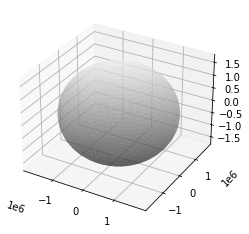

In [16]:
# x = np.outer(np.linspace(-3474.8/2*1000, 3474.8/2*1000, 30), np.ones(30))
# x
# from mpl_toolkits import mplot3d
# import numpy as np
# import matplotlib.pyplot as plt
# #求向量积(outer()方法又称外积)
# # x = np.outer(np.linspace(-2, 2, 30), np.ones(30))
# #矩阵转置
# y = x.copy().T 
# #数据z
# z = (x ** 2 + y ** 2)
# #绘制曲面图
# fig = plt.figure()
# ax = plt.axes(projection='3d')
# # 调用plot_surface()函数
# ax.plot_surface(x, y, z,cmap='viridis', edgecolor='none')
# ax.set_title('Surface plot')
# plt.show()

import matplotlib.pyplot as plt
import numpy as np


def hua_qiu(x, y, z, r, dense):
    """
        圆心坐标 半径 稠密程度
    """
    t = np.linspace(0, np.pi * 2, dense)
    s = np.linspace(0, np.pi, dense)
    t, s = np.meshgrid(t, s)             # 生成稠密网格点
    x = x + r * np.sin(s) * np.cos(t)    # 球面坐标公式
    y = y + r * np.sin(s) * np.sin(t)
    z = z + r * np.cos(s)
    return x, y, z


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
xx, yy, zz = hua_qiu(x=0, y=0, z=0, r=3474.8/2*1000, dense=40)
ax.plot_surface(xx, yy, zz, rstride=1, cstride=1, cmap='gray', alpha=0.5) # cmap='rainbow',
plt.show()


In [8]:
GPS_n_pos_raw

array([  8933810.29115592,  14323611.22254058, -20429755.64937826])

In [41]:
eph.Toe

<xarray.DataArray 'Toe' (time: 35, sv: 32)>
array([[    nan,     nan,     nan, ...,     nan,     nan,     nan],
       [    nan,     nan,     nan, ...,     nan,     nan,     nan],
       [489600.,     nan,     nan, ...,     nan,     nan,     nan],
       ...,
       [    nan, 597600.,     nan, ...,     nan,     nan,     nan],
       [    nan,     nan,     nan, ...,     nan,     nan,     nan],
       [    nan,     nan,     nan, ...,     nan,      0.,     nan]])
Coordinates:
  * time     (time) datetime64[ns] 2020-12-31T02:00:00 ... 2021-01-03
  * sv       (sv) <U3 'G01' 'G02' 'G03' 'G04' 'G05' ... 'G29' 'G30' 'G31' 'G32'